In [1]:
import os
import pandas as pd
import seaborn as sns
from full_fred.fred import Fred

# FRED_API_KEY = os.getenv('FRED_API_KEY')
fred = Fred()
print(f"env_api_key_found：{fred.env_api_key_found()}")

env_api_key_found：True


In [3]:
def get_fred_data(name, start="2013-01-01", end=""):
    df = fred.get_series_df(name)[["date", "value"]].copy()
    df["date"] = pd.to_datetime(df["date"])
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    df = df.set_index("date")

    if end == "":
        df = df.loc[f"{start}":]
    else:
        df = df.loc[f"{start}":f"{end}"]

    return df

## Unemployment Rate
link：https://fred.stlouisfed.org/series/UNRATE

In [4]:
df_UNRATE = get_fred_data("UNRATE", start="2010-01-01")
df_UNRATE.head(5)

,value
date,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


<AxesSubplot:xlabel='date', ylabel='value'>

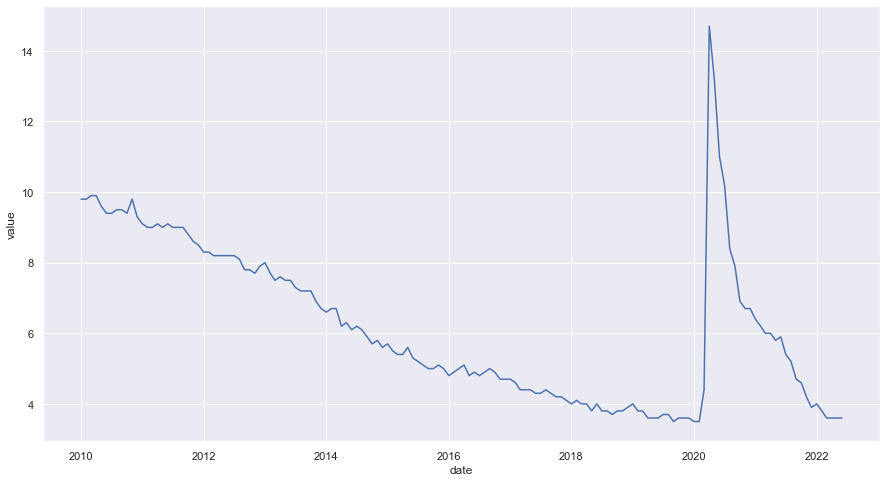

In [5]:
sns.set(rc={"figure.figsize": (15, 8)})
sns.lineplot(data=df_UNRATE, x="date", y="value")

## ICE BofA US High Yield Index Option-Adjusted Spread
ソース：https://fred.stlouisfed.org/series/BAMLH0A0HYM2

In [6]:
df_BAMLH0A0HYM2 = get_fred_data("BAMLH0A0HYM2", start="2010-01-01")
df_BAMLH0A0HYM2.head(5)

,value
date,
2010-01-01,NaN
2010-01-04,6.34
2010-01-05,6.30
2010-01-06,6.17
2010-01-07,6.03


## Wilshire US Large-Cap Growth Total Market Index
link：https://fred.stlouisfed.org/series/WILLLRGCAPGR

In [7]:
df_WILLLRGCAPGR = get_fred_data("WILLLRGCAPGR", start="2010-01-01")
df_WILLLRGCAPGR.head(5)

,value
date,
2010-01-01,NaN
2010-01-04,26423.03
2010-01-05,26494.24
2010-01-06,26473.92
2010-01-07,26512.36


<AxesSubplot:xlabel='date', ylabel='value'>

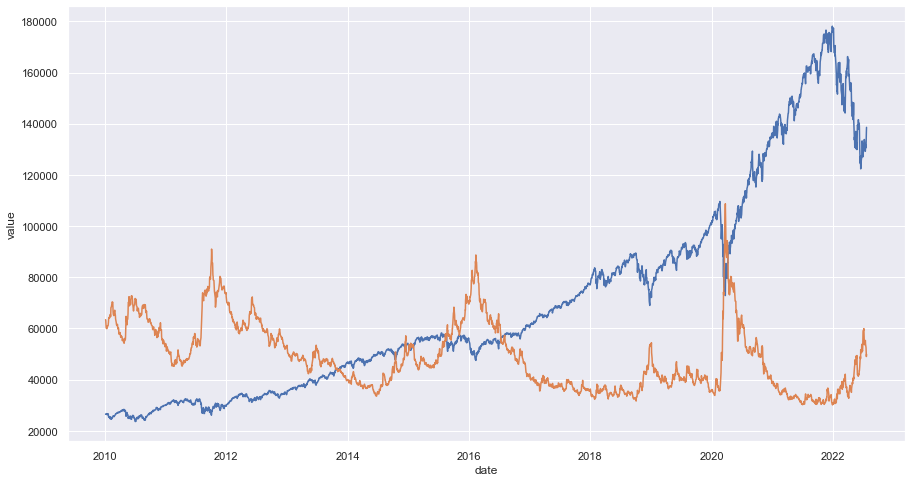

In [8]:
sns.set(rc={"figure.figsize": (15, 8)})
sns.lineplot(data=df_WILLLRGCAPGR, x="date", y="value")
sns.lineplot(data=df_BAMLH0A0HYM2 * 10000, x="date", y="value")